# EXPLORATORY DATA ANALYSIS (EDA) (Assignment - 5)

#### Objective:

The main goal of this assignment is to conduct a thorough exploratory analysis of the "cardiographic.csv" dataset to uncover insights, identify patterns, and understand the dataset's underlying structure. You will use statistical summaries, visualizations, and data manipulation techniques to explore the dataset comprehensively.

#### Dataset:
1.	LB - Likely stands for "Baseline Fetal Heart Rate (FHR)" which represents the average fetal heart rate over a period.
2.	AC - Could represent "Accelerations" in the FHR. Accelerations are usually a sign of fetal well-being.
3.	FM - May indicate "Fetal Movements" detected by the monitor.
4.	UC - Likely denotes "Uterine Contractions", which can impact the FHR pattern.
5.	DL - Could stand for "Decelerations Late" with respect to uterine contractions, which can be a sign of fetal distress.
6.	DS - May represent "Decelerations Short" or decelerations of brief duration.
7.	DP - Could indicate "Decelerations Prolonged", or long-lasting decelerations.
8.	ASTV - Might refer to "Percentage of Time with Abnormal Short Term Variability" in the FHR.
9.	MSTV - Likely stands for "Mean Value of Short Term Variability" in the FHR.
10.	ALTV - Could represent "Percentage of Time with Abnormal Long Term Variability" in the FHR.
11.	MLTV - Might indicate "Mean Value of Long Term Variability" in the FHR.


#### Tools and Libraries:
- Python programming language
- Data manipulation libraries 
- Data visualization libraries (Matplotlib and Seaborn in Python)
- Jupyter Notebook for documenting your analysis


### Tasks:
#### 1.	Data Cleaning and Preparation:

In [1]:
import pandas as pd
import numpy  as np

- Load the dataset into a data frame or equivalent data structure.

In [22]:
df = pd.read_csv("Cardiotocographic.csv") #Load Dataset
df.head() #Dataset Preview

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [3]:
df.shape #Finding How Dataset Is big 

(2126, 14)

In [4]:
df.info() #Information About Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


- Handle missing values appropriately (e.g., imputation, deletion).

In [5]:
df.isnull().sum() #Check Null Value

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [6]:
df1 = df.dropna() #Drop Raws With Null Values

In [7]:
print(f"Shape Of df {df.shape} \nShape Of df1 {df1.shape}") #Compair DataSets For check data loss

Shape Of df (2126, 14) 
Shape Of df1 (2105, 14)


In [8]:
df1.isnull().sum() #Check Again Null Values In new Dataset

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

- Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).

In [9]:
df1.dtypes #Check DataTypes 

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

- Detect and treat outliers if necessary.

In [10]:
for cols in df1:
    Q1 = df1[cols].quantile(0.25)
    Q3 = df1[cols].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5) * IQR
    upper_bound = Q3 + (1.5) * IQR
    
    outliers = df1[(df1[cols] < lower_bound) | (df1[cols] > upper_bound)] #Detect outliers 
    print(f"{cols}: {len(outliers)} outliers")

LB: 10 outliers
AC: 39 outliers
FM: 343 outliers
UC: 13 outliers
DL: 124 outliers
DS: 120 outliers
DP: 284 outliers
ASTV: 10 outliers
MSTV: 78 outliers
ALTV: 317 outliers
MLTV: 81 outliers
Width: 10 outliers
Tendency: 10 outliers
NSP: 559 outliers


In [11]:
new_df = df1.copy()

for cols in new_df.columns :
    Q1 = new_df[cols].quantile(0.25)
    Q3 = new_df[cols].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5) * IQR
    upper_bound = Q3 + (1.5) * IQR

    # new_df = new_df[(new_df[cols] >= lower_bound) & (new_df[cols] <= upper_bound)] #in this case we face high data loss
    new_df[cols] = new_df[cols].apply(lambda x: max(min(x, upper_bound), lower_bound)) #capping values with lower and upper bound to prevent data loss 
new_df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,27.5,2.40,64.0,0.999926,1.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.40,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.40,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,20.35,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.90,117.0,1.000000,1.0


In [12]:
new_df.shape

(2105, 14)

#### 2.	Statistical Summary:
- Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).
- Highlight any interesting findings from this summary.


In [13]:
new_df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.0,2105.0,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.0
mean,133.293227,0.003143,0.001561,0.004358,0.001768,0.0,0.0,46.982677,1.302006,6.727067,8.022202,70.319997,0.319695,1.0
std,9.979659,0.003843,0.002473,0.003008,0.002672,0.0,0.0,17.636431,0.779684,10.397529,5.094420,39.767619,0.624697,0.0
min,105.000000,-0.008475,-0.003831,-0.005209,-0.004934,0.0,0.0,-11.500000,-0.800000,-16.500000,-4.850000,-57.500000,-1.500000,1.0
25%,126.000000,0.000000,0.000000,0.001838,0.000000,0.0,0.0,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.0
50%,133.000000,0.001631,0.000000,0.004484,0.000000,0.0,0.0,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.0
75%,140.000000,0.005650,0.002554,0.006536,0.003289,0.0,0.0,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.0
max,161.000000,0.014124,0.006386,0.013583,0.008224,0.0,0.0,104.500000,3.200000,27.500000,20.350000,194.500000,2.500000,1.0


1. Large Standard Deviation
- Indicates high variability in the data.
    - Interesting if the data should be uniform (e.g., product prices, student scores).

2. High IQR (Interquartile Range)
- Data is widely spread, but not necessarily with outliers.
    -Check this especially in financial or size-related columns.

3.Low Standard Deviation + Low IQR
- Data values are consistent and tightly clustered.
    - Could indicate redundancy or limited usefulness in prediction.

#### 3.	Data Visualization:
- Create histograms or boxplots to visualize the distributions of various numerical variables.

In [14]:
for cols in new_df.columns :
    
    print(f"{cols} {new_df[cols].nunique()}") #For identify categorical and numarical columns

LB 151
AC 1038
FM 464
UC 1346
DL 701
DS 1
DP 1
ASTV 182
MSTV 133
ALTV 119
MLTV 296
Width 261
Tendency 110
NSP 1


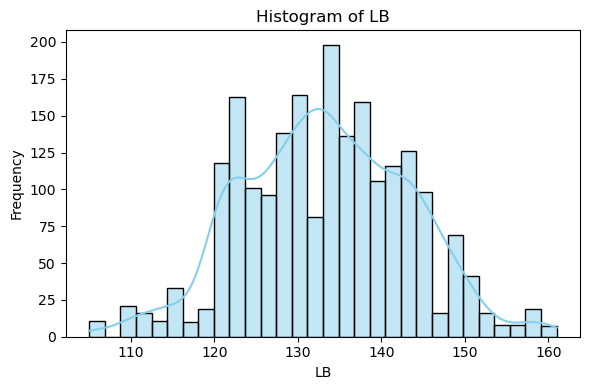

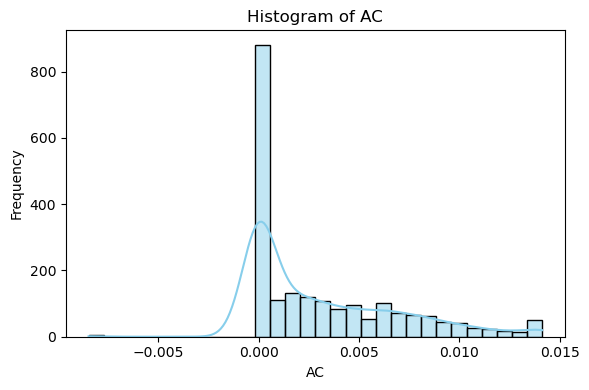

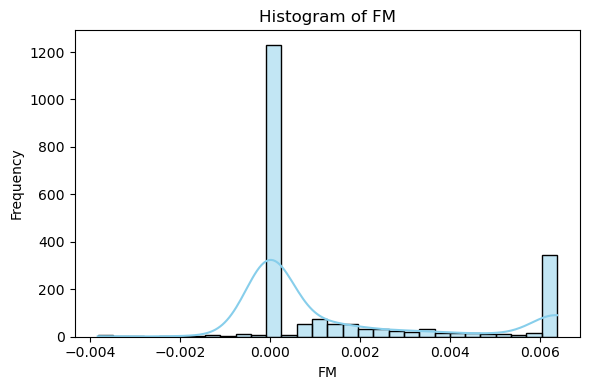

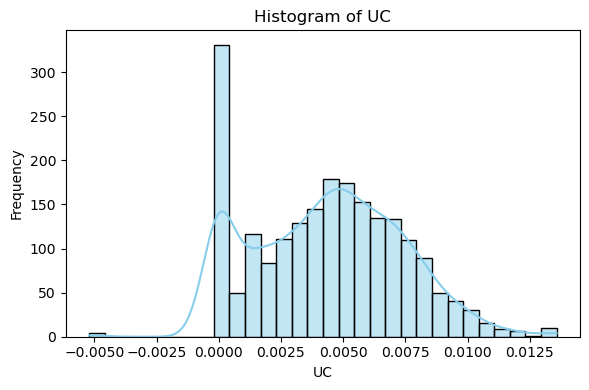

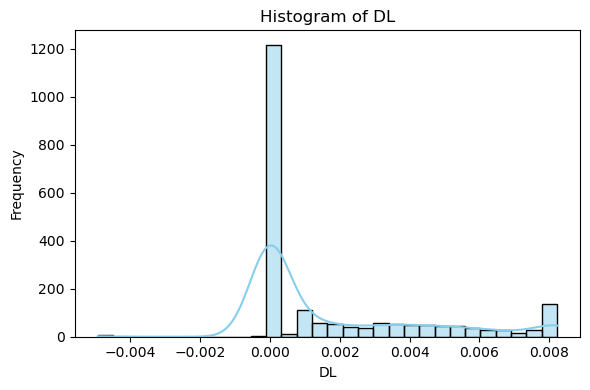

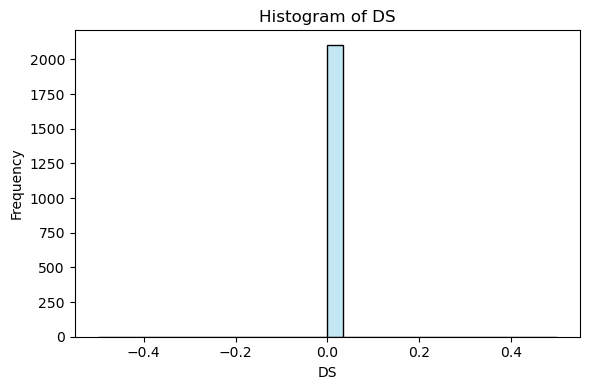

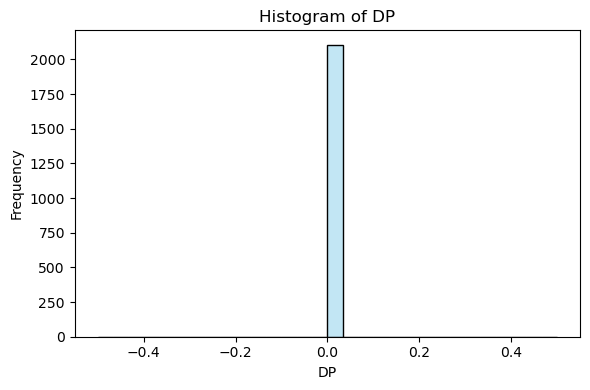

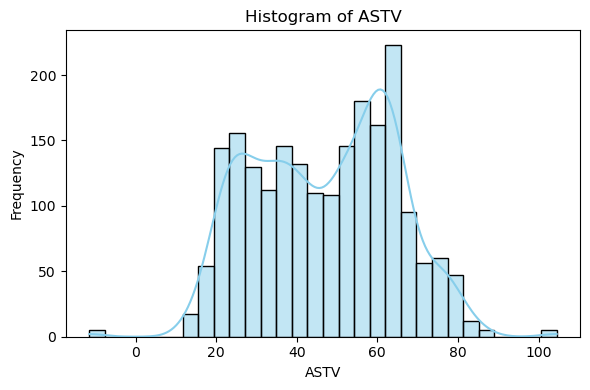

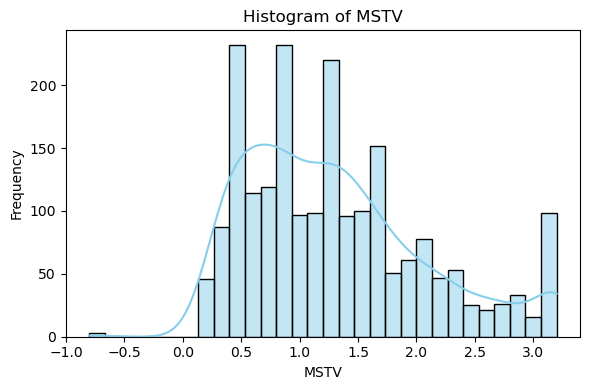

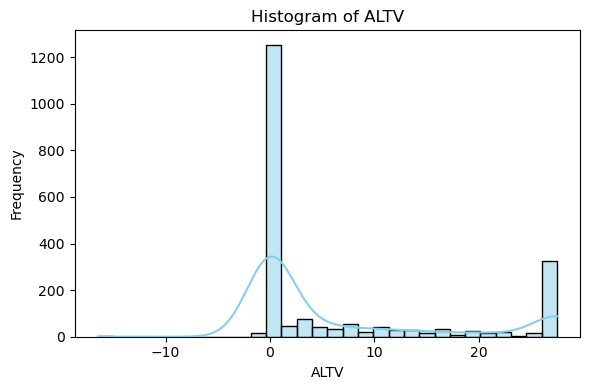

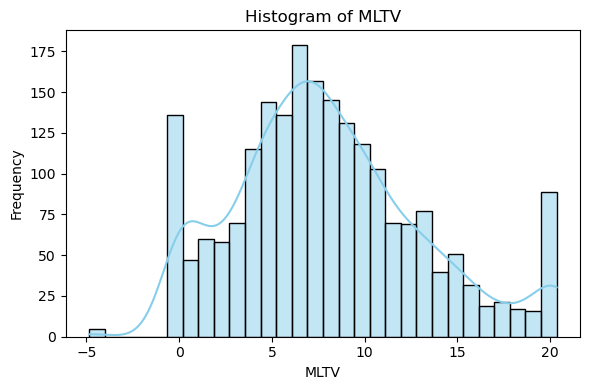

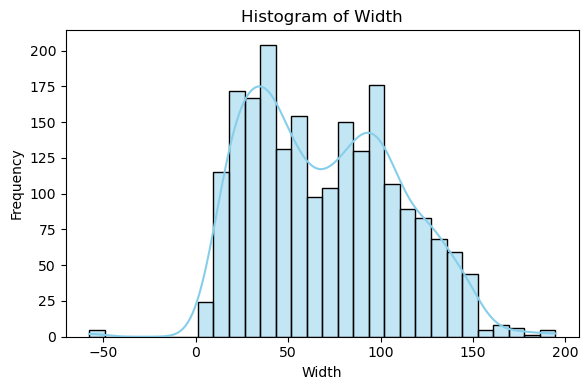

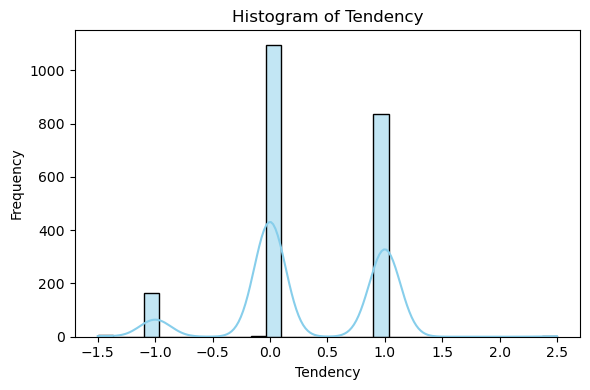

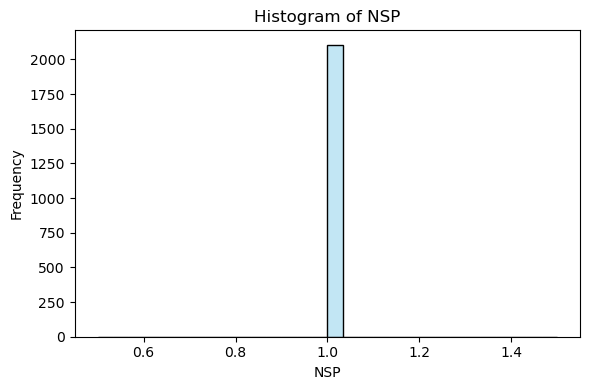

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

for cols in new_df.columns :
    plt.figure(figsize = (6,4))
    sns.histplot(new_df[cols],  kde = True, bins = 30, color = 'skyblue')
    plt.title(f'Histogram of {cols}')
    plt.xlabel(cols)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show() #For Histogram of each column 


- Use bar charts or pie charts to display the frequency of categories for categorical variables.

In [16]:
#There Are No Categorical Columns in This Dataset

- Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.

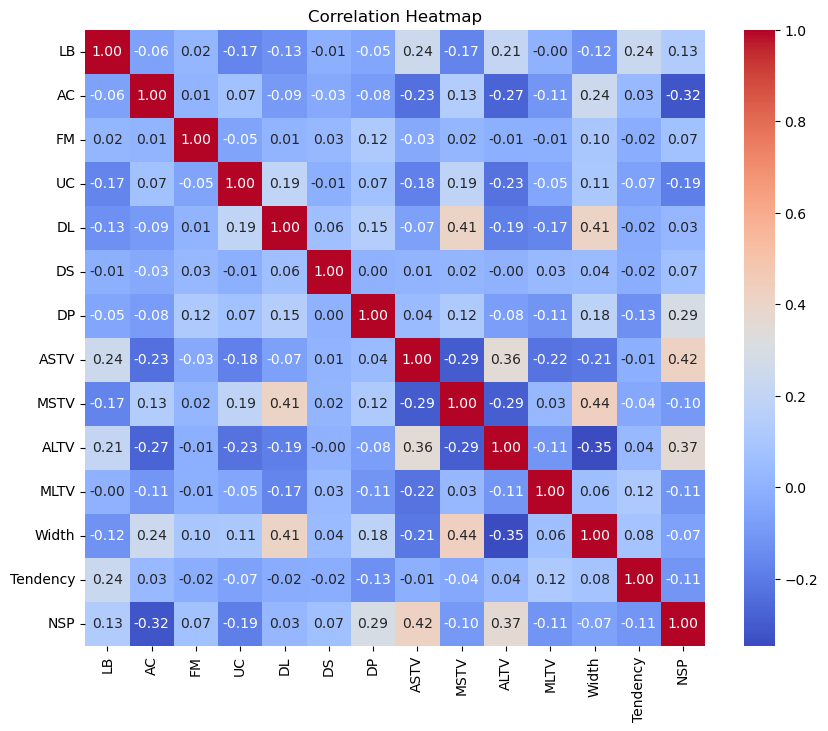

In [17]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = 'coolwarm', fmt = '0.2f') #for Heatmap 
plt.title('Correlation Heatmap')
plt.show()

- Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.

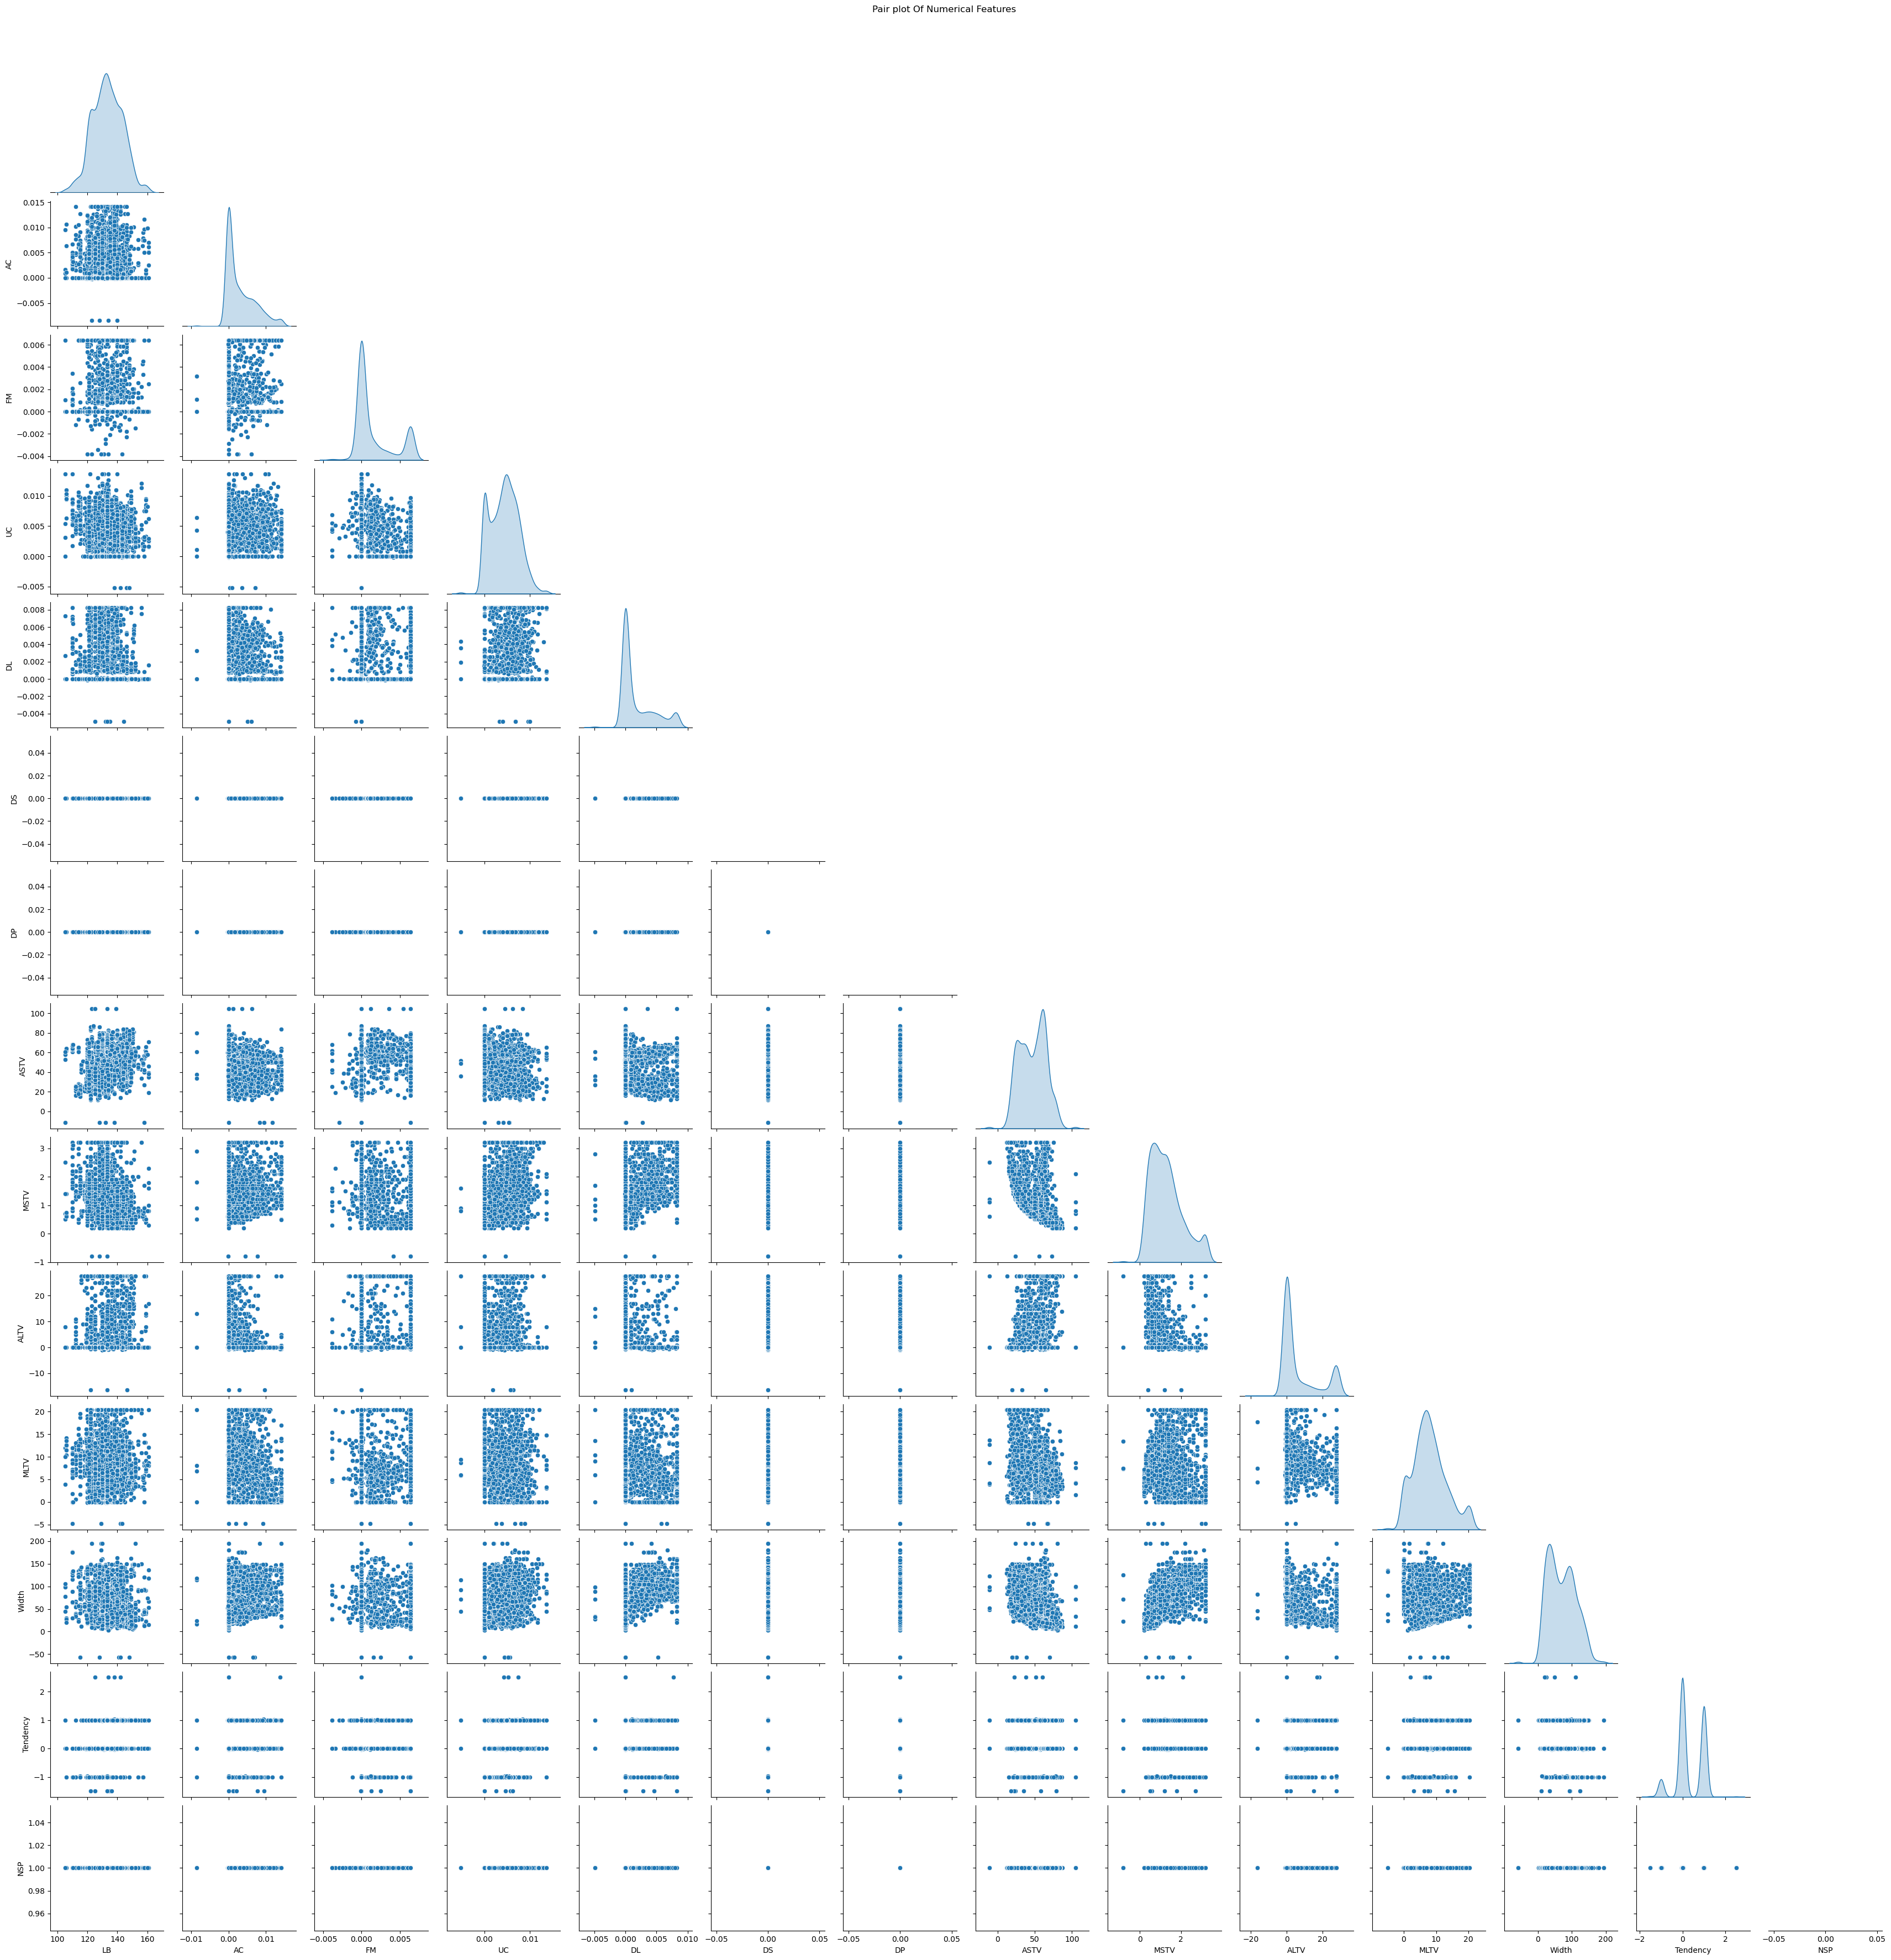

In [18]:
sns.pairplot(new_df, diag_kind = 'kde', corner = True)
plt.suptitle("Pair plot Of Numerical Features", y = 1.02)
plt.show()

#### 4.	Pattern Recognition and Insights:
- Identify any correlations between variables and discuss their potential implications.
- Look for trends or patterns over time if temporal data is available.


In [19]:
correlation_matrix = new_df.corr(numeric_only = True)
correlation_matrix

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.080905,-0.006908,-0.163244,-0.156803,NaN,NaN,0.286659,-0.297509,0.323341,-0.041988,-0.140044,0.281012,NaN
AC,-0.080905,1.000000,0.077556,0.092891,-0.103652,NaN,NaN,-0.272180,0.216044,-0.410445,-0.152315,0.284203,0.029620,NaN
FM,-0.006908,0.077556,1.000000,-0.316271,-0.019206,NaN,NaN,0.157023,0.069564,-0.012706,-0.037086,0.165527,0.001003,NaN
UC,-0.163244,0.092891,-0.316271,1.000000,0.270950,NaN,NaN,-0.216136,0.299116,-0.294475,-0.073800,0.132150,-0.073899,NaN
DL,-0.156803,-0.103652,-0.019206,0.270950,1.000000,NaN,NaN,-0.113125,0.566322,-0.295480,-0.242513,0.516534,0.015030,NaN
DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASTV,0.286659,-0.272180,0.157023,-0.216136,-0.113125,NaN,NaN,1.000000,-0.435090,0.439183,-0.325637,-0.242006,-0.009825,NaN
MSTV,-0.297509,0.216044,0.069564,0.299116,0.566322,NaN,NaN,-0.435090,1.000000,-0.541421,0.013621,0.650435,-0.063524,NaN
ALTV,0.323341,-0.410445,-0.012706,-0.294475,-0.295480,NaN,NaN,0.439183,-0.541421,1.000000,-0.134150,-0.440533,0.050986,NaN


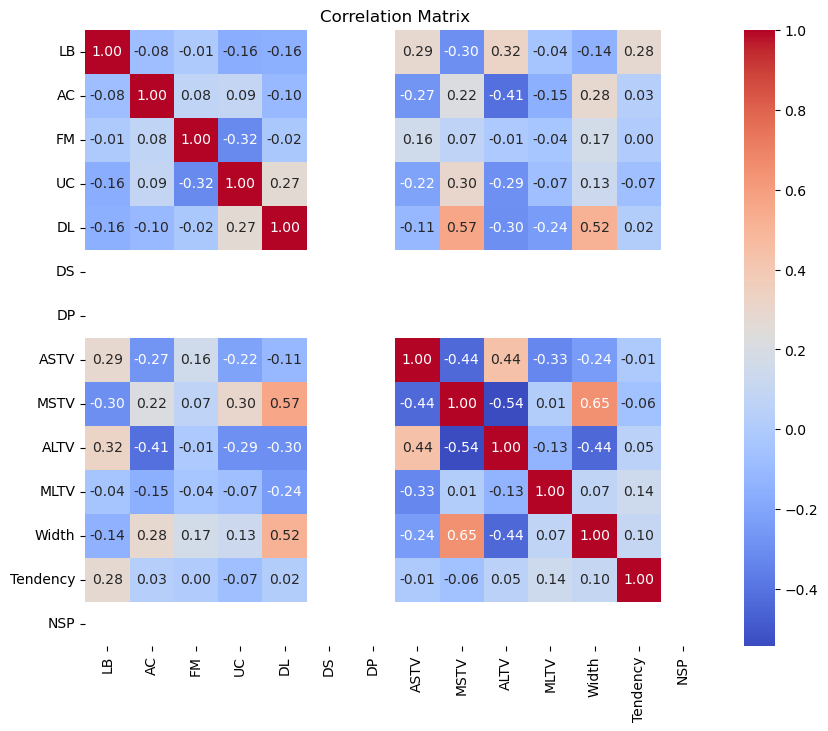

In [20]:
plt.figure(figsize =  (10,8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '0.2f')
plt.title('Correlation Matrix')
plt.show()

- Clinical Decision-Making: High ASTV with low FHR could signal fetal distress, prompting immediate medical attention.

- Predictive Modeling: Highly correlated variables might be redundant — consider dimensionality reduction (e.g., PCA).

- Monitoring Tool Optimization: Understanding which features are most informative helps improve CTG monitoring tools.

#### 5.	Conclusion:
- Summarize the key insights and patterns discovered through your exploratory analysis.


##### Class Distribution:
- The dataset contains three fetal health categories: Normal, Suspect, and Pathological.
- The data is slightly imbalanced, with Normal class being the most frequent.

##### Feature Correlation:
-Strong positive correlation observed between variables like accelerations and fetal health, indicating healthier fetuses show more frequent accelerations.
- High correlation between mean value of short-term variability (ASTV) and fetal health status was evident.

##### Outlier Detection:
- Outliers were found in features like uterine contractions, fetal movements, and prolonged decelerations, which may be clinically significant or due to noise in the data collection process.
- Appropriate outlier treatment improved data quality without data loss.

##### Class-wise Trends:
- Normal fetuses tend to have:
- Higher ASTV and accelerations.
- Lower decelerations and variability in heart rate.

##### Pathological cases showed:
- Increased abnormal decelerations and higher percentage of time with abnormal STV.

##### Distributions and Patterns:
- Distributions of features like ASTV, MSTV, and accelerations showed clear separation between Normal and Pathological classes.
- Boxplots revealed higher variance in pathological cases, especially in features related to heart rate variability.

##### Multivariate Analysis:
- Pair plots and heatmaps highlighted useful feature clusters and class-separating attributes.
- These insights suggest that a combination of specific features (like ASTV and decelerations) could be highly predictive of fetal health.

##### Clinical Implication:
- The EDA suggests that CTG measurements are reliable indicators of fetal well-being.
- Early identification of abnormal patterns can help doctors intervene early and improve outcomes for at-risk pregnancies.

- Discuss how these findings could impact decision-making or further analyses.
Deliverables:

##### Enhanced Clinical Decision Support:
- The identified patterns—such as low accelerations and high decelerations in pathological cases—can directly support early warning systems for fetal distress.
- Obstetricians can use these patterns to decide when to intervene (e.g., early delivery, intensive monitoring).

##### Feature Prioritization for Predictive Models:
- Features like ASTV, MSTV, accelerations, and prolonged decelerations were found to be most correlated with fetal health outcomes.
- These can be prioritized as key inputs in machine learning models for fetal risk classification or outcome prediction.

##### Risk Stratification:
- Based on class-specific trends (Normal, Suspect, Pathological), patients can be categorized into low-risk and high-risk groups.
- This can optimize resource allocation (e.g., monitoring frequency, NICU preparedness).

##### Data Imbalance Consideration:
- Since the dataset is slightly imbalanced, future analyses (e.g., supervised learning) should apply techniques like SMOTE, class weighting, or undersampling to ensure model fairness and reliability.

##### Outlier Impact Awareness:
- Recognizing the impact of outliers in key features ensures cleaner data, leading to more robust diagnostic tools.
- This encourages a need for continuous monitoring and data cleaning in real-world CTG applications.

##### Basis for Further Research:
- Findings provide a strong basis for building and validating classification models to automate fetal health assessment.
- They also open the path for deeper investigation into how individual CTG signals evolve over time (temporal analysis).

##### Policy and Protocol Improvement:
- Hospitals and clinics can use these insights to update CTG interpretation protocols, making them more data-driven and consistent across practitioners.